# SEMT Data Science and Applied Statics 
## $Hongze Lin - 2650079$
# Part A - Data Science 
        Answer Skeleton 
        1. Code and Aswer(Output of the Code)
        2. Explanation of the Code
---
# $Question 1$
#### Question  (1) Set up - Code for basic Python Package and data file loading 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.manifold import TSNE

# Load the .npz file
data = np.load('image_data.npz')

# Extract data
train_X = data['train_X']  # Training set features
train_y = data['train_Y'].flatten()  # Flatten to 1D array for Counter
test_X = data['test_X']    # Test set features
test_y = data['test_Y'].flatten()    # Flatten to 1D array (for consistency)

## Question 1(a)
---
#### Code and Answer: 

=== Question 1a ===
Training dataset: 11280 items, 784 features
Test dataset: 1880 items, 784 features


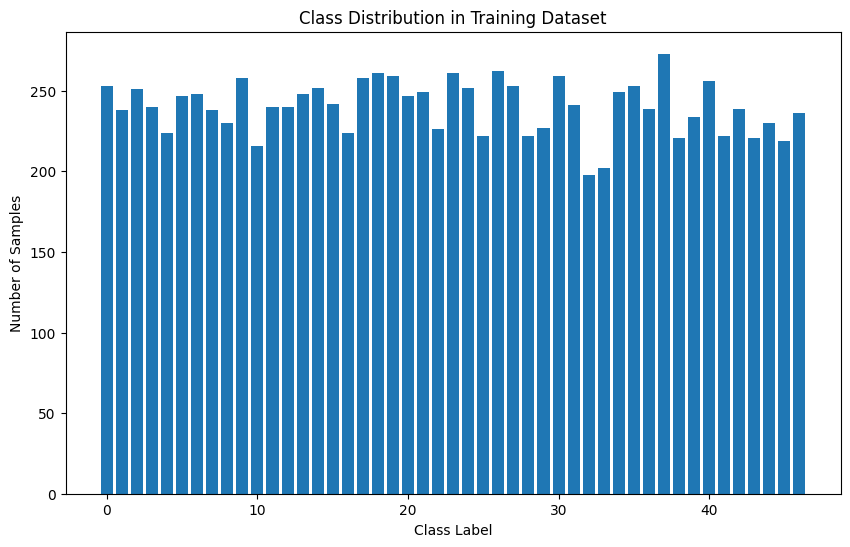

In [8]:
print("=== Question 1a ===")
# Descriptive statistics for training and test datasets
train_items, train_features = train_X.shape
test_items, test_features = test_X.shape
print(f"Training dataset: {train_items} items, {train_features} features")
print(f"Test dataset: {test_items} items, {test_features} features")

# Class distribution in training dataset
train_class_counts = Counter(train_y)
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Dataset')
plt.show()

#### Explanation:
Loads the dataset with $np.load('image_data.npz')$. Prints the number of items and features for training/test sets. Counts class frequency using $Counter (train\_y)$ and plots a bar chart comparing populations of each label class for visualization, as it could clearly convey the relative frequencies of discrete labels.

## Question 1(b)
---
#### Code and Answer

Image dimensions inferred: 28x28
Selected classes for 1b: [27 39 26 43]


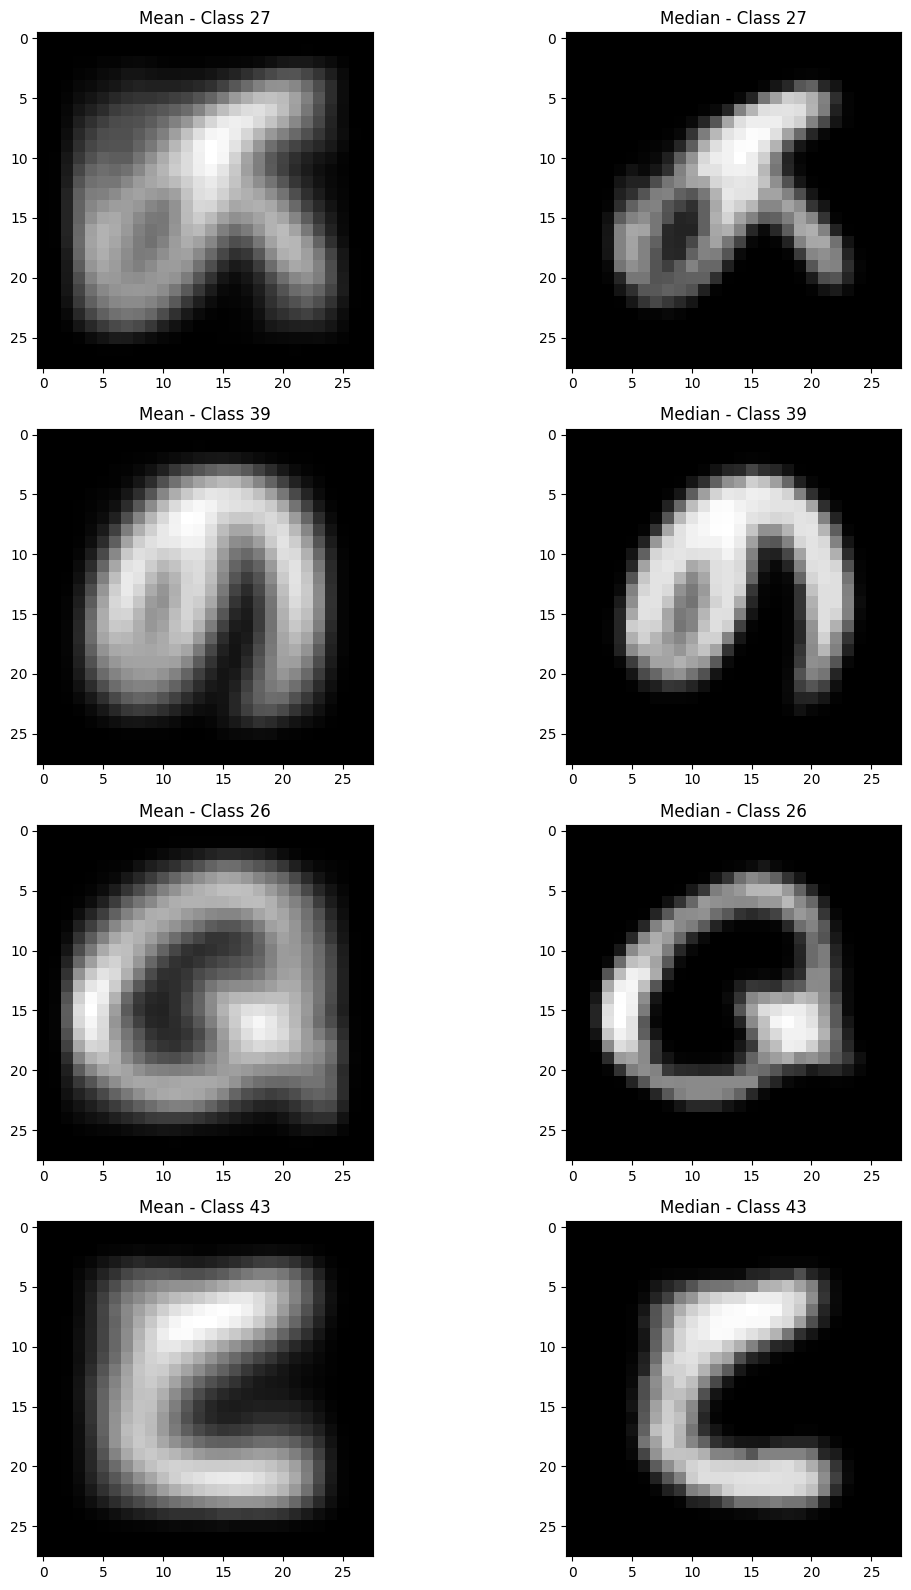

In [9]:
# Assume image dimensions (e.g., 28x28 for 784 features)
img_dim = int(np.sqrt(train_features))  # Compute image dimensions from feature count
print(f"Image dimensions inferred: {img_dim}x{img_dim}")

# Select 4 random distinct classes
np.random.seed(42)
selected_classes = np.random.choice(np.unique(train_y), 4, replace=False)
print(f"Selected classes for 1b: {selected_classes}")

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
for i, cls in enumerate(selected_classes):
    # Filter features for current class
    cls_features = train_X[train_y == cls]
    # Compute mean and median images
    mean_img = np.mean(cls_features, axis=0).reshape(img_dim, img_dim)
    median_img = np.median(cls_features, axis=0).reshape(img_dim, img_dim)
    # Visualize
    axes[i, 0].imshow(mean_img, cmap='gray')
    axes[i, 0].set_title(f'Mean - Class {cls}')
    axes[i, 1].imshow(median_img, cmap='gray')
    axes[i, 1].set_title(f'Median - Class {cls}')
plt.tight_layout()
plt.show()

#### Explanation 
Infers the image side length via $img\_dim = int(np.sqrt(train\_features))$ and reshapes each vector into $img\_dim \times img\_dim$. Randomly selects four distinct labels $(np.random.choice(np.unique(train\_y),4,replace = False)with seed 42)$ and for each class, the code computes pixel-wise mean and median images and visualizes them in a grayscale graph. Visualizing ___the mean image___ for representing the overall average appearance of the class while plotting the ___Median image___ to decrease the affection from outliers or noise and show the robust central tendency.

## Question 1(c)
---
#### Code and Answer:

Selected classes for 1c: 27, 39


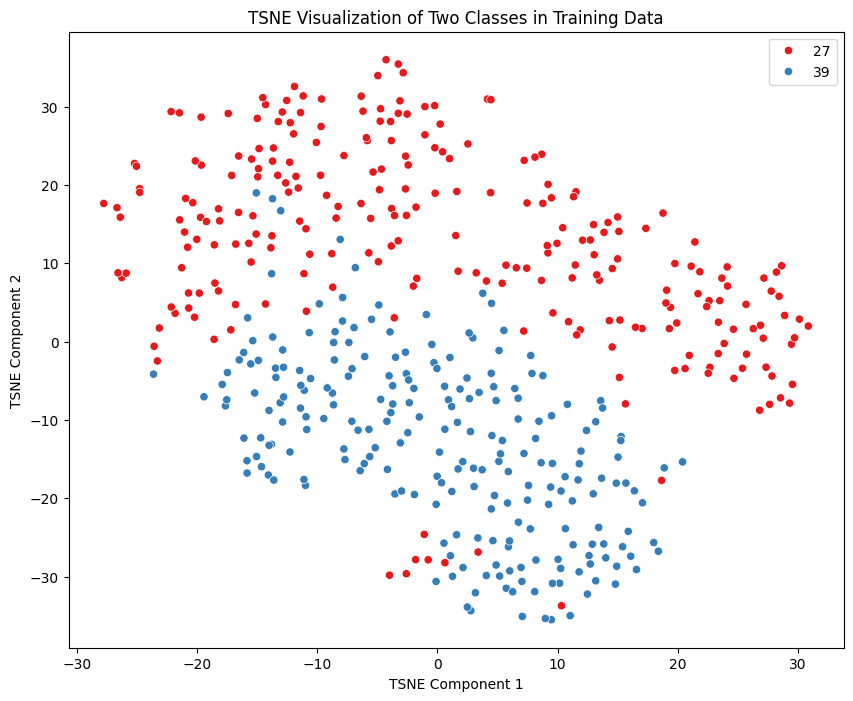

Discussion: If the two clusters are well-separated in the TSNE plot, it suggests potential linear separability; overlapping clusters indicate likely non-separability.


In [10]:
# Select two classes for visualization
class1, class2 = selected_classes[0], selected_classes[1]
print(f"Selected classes for 1c: {class1}, {class2}")

# Filter features for the two classes
class1_feats = train_X[train_y == class1]
class2_feats = train_X[train_y == class2]

# Combine features and create labels for TSNE
combined_feats = np.vstack([class1_feats, class2_feats])
combined_labels = np.hstack([np.full(len(class1_feats), class1), np.full(len(class2_feats), class2)])

# Apply TSNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(combined_feats)

# Plot TSNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_embedding[:, 0], y=tsne_embedding[:, 1], hue=combined_labels, palette='Set1')
plt.title('TSNE Visualization of Two Classes in Training Data')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()
print("Discussion: If the two clusters are well-separated in the TSNE plot, it suggests potential linear separability; overlapping clusters indicate likely non-separability.")


Select first two of the previously chosen classes and stack their feature matrices and apply t-SNE to project high-dimensional pixel data in two dimensions. Applying t-SNE as it could preserve local neighborhoods and reveal clusters or overlap between classes: well-separated clusters for potentially linearly separable while overlapping clusters for likely require non-linear models.

## Question 1(d)
---
#### Code and Answer

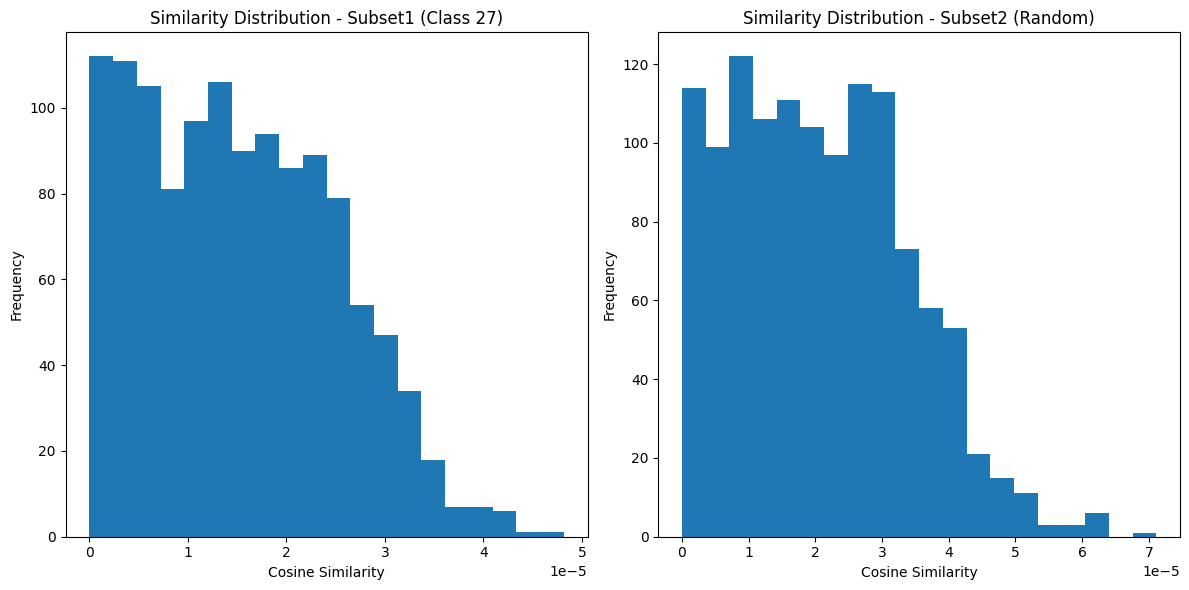

Explanation: Higher peak of high similarity values in subset1 histogram indicates images within the same class are more similar. Subset2’s flatter histogram shows random images are less similar.


In [11]:
# Choose a specific class for subset1
subset1_class = selected_classes[0]
subset_size = 50  # Define subset size

# Create subset1 (specific class)
subset1 = train_X[train_y == subset1_class][:subset_size]
# Create subset2 (random from entire training data)
np.random.seed(42)
subset2 = train_X[np.random.choice(len(train_X), subset_size, replace=False)]

# Define similarity metric (e.g., cosine similarity)
def cosine_similarity(img1, img2):
    dot = np.dot(img1, img2)
    norm1 = np.linalg.norm(img1)
    norm2 = np.linalg.norm(img2)
    return dot / (norm1 * norm2)

# Compute pairwise similarities for each subset
def compute_pairwise_sims(feats):
    sims = []
    for i in range(len(feats)):
        for j in range(i + 1, len(feats)):
            sims.append(cosine_similarity(feats[i], feats[j]))
    return sims

subset1_sims = compute_pairwise_sims(subset1)
subset2_sims = compute_pairwise_sims(subset2)

# Plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(subset1_sims, bins=20)
plt.title(f'Similarity Distribution - Subset1 (Class {subset1_class})')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(subset2_sims, bins=20)
plt.title('Similarity Distribution - Subset2 (Random)')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
print("Explanation: Higher peak of high similarity values in subset1 histogram indicates images within the same class are more similar. Subset2’s flatter histogram shows random images are less similar.")

#### Explanation 
Create two subsets: subset1 - 50 images from one specific class, while subset2 - 50 images randomly chosen from the whole training set. Defines a cosine-similarity metric $ sim(x.y) = \frac{x \cdot y}{||x||\cdot ||y||} $
Computes all pairwise similarities within each subset and plots two histograms side by side. Applying $Cosine Similarity$ because it could ignore the overall brightness, focusing on the pattern shape, which is ideal for handwriting vectors. The similarity distribution of $Same-class$ shifts right in general, as the structure is more similar while $Random Images$ would have a flatter, lower-similarity distribution.


# $Question 2$
#### Question 2 Setup - Code for basic Python Package and File Loading 


In [16]:
# import Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, adjusted_rand_score)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Load data and flatten labels
data = np.load('image_data.npz')
train_X = data['train_X']
train_y = data['train_Y'].flatten()
test_X = data['test_X']
test_y = data['test_Y'].flatten()

#### Prepare two-class subsets

In [19]:
# Prepare two-class subsets 
class_counts = Counter(train_y)
sorted_classes = sorted(class_counts.items(), key=lambda x: -x[1])
target_classes = [cls for cls, _ in sorted_classes[:2]]
print(f"Selected classes: {target_classes}")

# Balance training data
train_mask = np.isin(train_y, target_classes)
train_subset = train_X[train_mask]
train_labels = train_y[train_mask]
class_counts = Counter(train_labels)
min_train = min(class_counts.values())
train_balanced = np.vstack([
    train_subset[train_labels == target_classes[0]][:min_train],
    train_subset[train_labels == target_classes[1]][:min_train]
])
train_labels_balanced = np.hstack([
    np.full(min_train, target_classes[0]),
    np.full(min_train, target_classes[1])
])

# Balance test data
test_mask = np.isin(test_y, target_classes)
test_subset = test_X[test_mask]
test_labels = test_y[test_mask]
class_counts_test = Counter(test_labels)
min_test = min(class_counts_test.values())
test_balanced = np.vstack([
    test_subset[test_labels == target_classes[0]][:min_test],
    test_subset[test_labels == target_classes[1]][:min_test]
])
test_labels_balanced = np.hstack([
    np.full(min_test, target_classes[0]),
    np.full(min_test, target_classes[1])
])

# Binary labels (0/1)
binary_train_labels = np.where(train_labels_balanced == target_classes[0], 0, 1)
binary_test_labels = np.where(test_labels_balanced == target_classes[0], 0, 1)

# Standardize features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_balanced)
test_scaled = scaler.transform(test_balanced)


Selected classes: [np.uint8(37), np.uint8(26)]


# Question 2(a-i)
---
#### Code and Answer

In [13]:
# Basic Model
def evaluate(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, zero_division=1):.4f}")
    print(f"F1: {f1_score(y_true, y_pred, zero_division=1):.4f}")

# Logistic Regression (basic)
lr_basic = LogisticRegression(max_iter=1000, random_state=42)
lr_basic.fit(train_scaled, binary_train_labels)
evaluate(binary_test_labels, lr_basic.predict(test_scaled), "Logistic Regression (Basic)")

# KNN (basic)
knn_basic = KNeighborsClassifier()
knn_basic.fit(train_scaled, binary_train_labels)
evaluate(binary_test_labels, knn_basic.predict(test_scaled), "KNN (Basic)")

# Random Forest (basic)
rf_basic = RandomForestClassifier(random_state=42)
rf_basic.fit(train_scaled, binary_train_labels)
evaluate(binary_test_labels, rf_basic.predict(test_scaled), "Random Forest (Basic)")



--- Logistic Regression (Basic) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

--- KNN (Basic) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

--- Random Forest (Basic) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


#### Explanation 
| Model               | Concept                          | Expected Behavior                      |
|---------------------|:---------------------------------|:---------------------------------------|
| Logistic Regression | Linear Decision Boundary         | Test Linear Separability               |
| KNN                 | Non-parametric, Discrete-Based   | Captures Non-Linear Structure          |
| Random Forest       | Ensemble of Tress                | Handle Complex, High-variance patterns |            

Each model is fitted in the training subset and evaluated in the test subset using $Accuracy$, $Precision$, $Recall$, $F1$; Comparison of metrics to indicate whether a linear model suffices. If the result of KNN/RF $>>$ LR, the boundaries are non-linear; if LR $\approx$ RF, classes are nearly linearly separable.

# Question 2(a-ii)
---
#### Code and Answer:

In [14]:
# Hyperparameter tuning with balanced K-fold CV
def k_fold_cv(X, y, model, params, k=5):
    fold_size = len(X) // k
    best_score = -1
    best_param = None
    
    for param in params:
        scores = []
        for i in range(k):
            val_indices = []
            for cls in [0, 1]:
                cls_indices = np.where(y == cls)[0]
                start = i * (len(cls_indices) // k)
                end = (i + 1) * (len(cls_indices) // k)
                val_indices.extend(cls_indices[start:end])
            
            X_val = X[val_indices]
            y_val = y[val_indices]
            train_indices = [idx for idx in range(len(X)) if idx not in val_indices]
            X_train_fold = X[train_indices]
            y_train_fold = y[train_indices]
            
            model.set_params(**param)
            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val)
            scores.append(f1_score(y_val, y_pred, zero_division=1))
        
        mean_score = np.mean(scores)
        if mean_score > best_score:
            best_score = mean_score
            best_param = param
    
    return best_param, best_score

# Tune Logistic Regression (C)
lr = LogisticRegression(max_iter=1000, random_state=42)
lr_params = [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}]
best_lr_param, best_lr_score = k_fold_cv(train_scaled, binary_train_labels, lr, lr_params)
print(f"\nBest Logistic Regression Param: {best_lr_param} (CV F1: {best_lr_score:.4f})")
evaluate(binary_test_labels, LogisticRegression(** best_lr_param, max_iter=1000).fit(train_scaled, binary_train_labels).predict(test_scaled), "Logistic Regression (Tuned)")

# Tune KNN (n_neighbors)
knn = KNeighborsClassifier()
knn_params = [{'n_neighbors': 1}, {'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}]
best_knn_param, best_knn_score = k_fold_cv(train_scaled, binary_train_labels, knn, knn_params)
print(f"\nBest KNN Param: {best_knn_param} (CV F1: {best_knn_score:.4f})")
evaluate(binary_test_labels, KNeighborsClassifier(**best_knn_param).fit(train_scaled, binary_train_labels).predict(test_scaled), "KNN (Tuned)")

# Tune Random Forest (n_estimators)
rf = RandomForestClassifier(random_state=42)
rf_params = [{'n_estimators': 50}, {'n_estimators': 100}, {'n_estimators': 200}]
best_rf_param, best_rf_score = k_fold_cv(train_scaled, binary_train_labels, rf, rf_params)
print(f"\nBest Random Forest Param: {best_rf_param} (CV F1: {best_rf_score:.4f})")
evaluate(binary_test_labels, RandomForestClassifier(** best_rf_param, random_state=42).fit(train_scaled, binary_train_labels).predict(test_scaled), "Random Forest (Tuned)")



Best Logistic Regression Param: {'C': 0.01} (CV F1: 0.9810)

--- Logistic Regression (Tuned) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

Best KNN Param: {'n_neighbors': 1} (CV F1: 0.9845)

--- KNN (Tuned) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000

Best Random Forest Param: {'n_estimators': 50} (CV F1: 0.9828)

--- Random Forest (Tuned) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1: 1.0000


#### Explanation:
Defines a ___k\_fold\_cv()___ function: 
  - Maintain class balance in each fold by selecting equal proportions per class
  - Train on k-1 folds, validates on the held-out fold
  - Record the best parameter and its average F1 index
  
Research Grids: 
  - Logistic Regression: c $\in$ {0.001, 0.01, 0.1, 1, 10} 
  - KNN: n\_neighbors $\in$ {1,3,5,7,9}
  - Random Forest: n\_estimators $\in$ {50, 100, 200} 
  
Retrains the model with the best parameter and evaluates in the test set.


# Question 2(b)
---
#### Code and Answer:


K-means Adjusted Rand Index: 0.0000
Confusion Matrix (True vs Adjusted Clusters):
[[34  0]
 [33  1]]


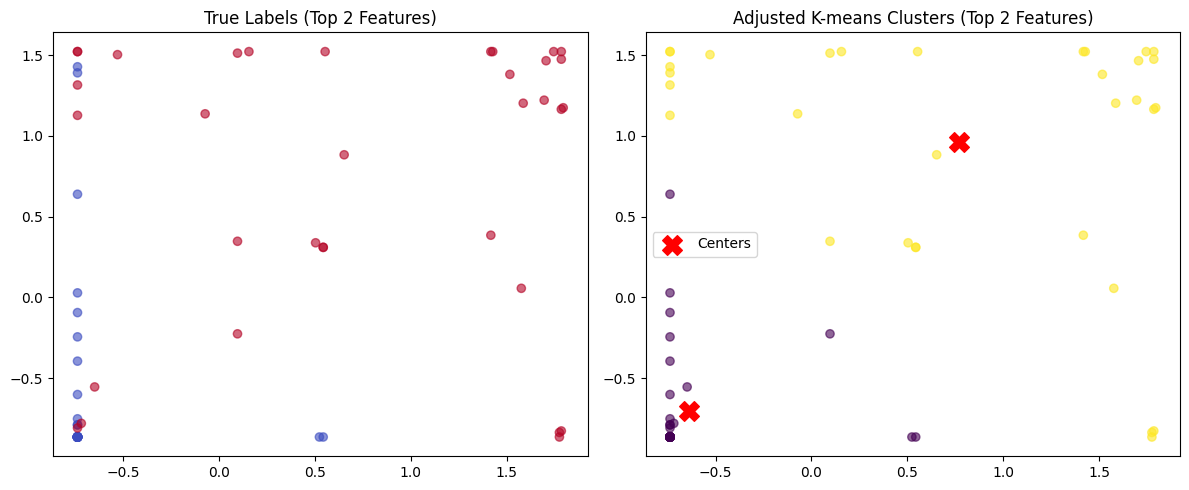

In [20]:
# K-means clustering with proper evaluation
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(test_scaled)

def adjust_cluster_labels(true_labels, cluster_labels):
    cm = confusion_matrix(true_labels, cluster_labels)
    if cm[0,0] + cm[1,1] < cm[0,1] + cm[1,0]:
        return 1 - cluster_labels
    return cluster_labels

adjusted_clusters = adjust_cluster_labels(binary_test_labels, cluster_labels)

ari = adjusted_rand_score(binary_test_labels, adjusted_clusters)
print(f"\nK-means Adjusted Rand Index: {ari:.4f}")
print("Confusion Matrix (True vs Adjusted Clusters):")
print(confusion_matrix(binary_test_labels, adjusted_clusters))

pca = PCA(n_components=2)
test_pca = pca.fit_transform(test_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

selector = SelectKBest(score_func=f_classif, k=2)
train_selected = selector.fit_transform(train_scaled, binary_train_labels)
test_selected = selector.transform(test_scaled)


top_feat_indices = np.argsort(selector.scores_)[-2:] 


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_selected[:,0], test_selected[:,1], c=binary_test_labels, cmap='coolwarm', alpha=0.6)
plt.title('True Labels (Top 2 Features)')


kmeans_feat = KMeans(n_clusters=2, n_init=10, random_state=42)
cluster_labels_feat = kmeans_feat.fit_predict(test_selected)
adjusted_clusters_feat = adjust_cluster_labels(binary_test_labels, cluster_labels_feat)

plt.subplot(1, 2, 2)
plt.scatter(test_selected[:,0], test_selected[:,1], c=adjusted_clusters_feat, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_feat.cluster_centers_[:,0], kmeans_feat.cluster_centers_[:,1], marker='X', s=200, c='red', label='Centers')
plt.title('Adjusted K-means Clusters (Top 2 Features)')
plt.legend()
plt.tight_layout()
plt.show()

#### Explanation:
Applies $KMeans$(n\_clusters = 2, n\_init = 10, random\_state = 42) to the test subset; Aligns cluster labels with true labels using a confusion-matrix-based correction, thus avoiding random inversion of cluster numbering; Calculate the $Adjusted Rand Index$(ARI)(Range $\in[-1,1]$), which is the standard unsupervised metric, to quantify the similarity between the clusters and the true labels; Plot the $2-D PCA$ projection pf test samples with cluster color and labels, and $SelectKBest Graph$ (top 2 features) visualization with cluster centers.